<a href="https://colab.research.google.com/github/lucasjirwin/Nearest-Neighbour-Classification-/blob/main/Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [1]:
!git clone https://github.com/lucasjirwin/Nearest-Neighbour-Classification-

Cloning into 'Nearest-Neighbour-Classification-'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [8]:
with open('Nearest-Neighbour-Classification-/mnist2000.pkl', 'rb') as fh:
  unpickled_mnist = pkl.load(fh)

print(unpickled_mnist)

trained_images = unpickled_mnist['train_images']

{'train_images': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.

4
(28, 28)


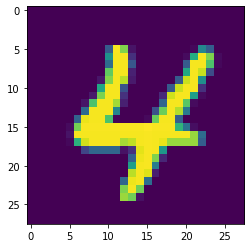

In [9]:
plt.imshow(trained_images[100,:,:])
train_labels = unpickled_mnist['train_labels']
print(train_labels[100])
print(trained_images[100].shape)

Checked that training lables correspond to the correct number displayed in the image.  

658
Does 1 = 1? then accurate!


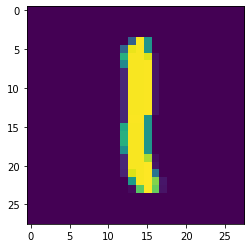

In [20]:
test_images = unpickled_mnist['test_images'] 

# Used basic Euclidean distance in pixels to make a classification function 
# by (1) computing the squared distances between the test image and the 
# training data, (2) using the argmin function to determine index of training
# image with smallest distance to the image and (3) using the index to return
# right training label
def classify(test_image): 
  sq_dists = (test_image - trained_images) * (test_image - trained_images)
  sq_dists = np.sum(sq_dists, axis = 1)
  sq_dists = np.sum(sq_dists, axis = 1)
  smallest = np.argmin(sq_dists)
  return smallest

print(classify(test_images[10])) # 658 
test_labels = unpickled_mnist['test_labels']

# Check if the training label corresponds to the test label 
print(f"Does {test_labels[10]} = {train_labels[658]}? then accurate!")  
plt.imshow(trained_images[658]) # Check if the training image displays the right number




Upon testing my classify function, I have noticed that the index returned often corresponds to the number displayed in the test images. This suggests that the calculation of minimum Euclidean distances between the pixels in the test image and all the trained images is an effective way of classifying the test images.

In [24]:
sum = 0 

# Run the classification algorithm for all test images 
# and report the accuracy of the classifier
for ii in range(150):
  train = classify(test_images[ii])
  train = train_labels[train]
  test = test_labels[ii]
  if train == test:
    sum = sum + 1

accuracy = (sum/150) * 100
print(f"{accuracy}%")

85.33333333333334%


I found that my classifier was approximately 85% accurate 